# Queueing network using matrices to define the transition rates between the stations

The following modes consists of two process stations. The clients generated at the source are sent to one of the two process stations. From there the clients can go to the exit or again to one of the two process stations. The transition rates between the stations are defined by matrices.

## Importing modules

In [1]:
# Simulator
from queuesim import Simulator

# Station types
from queuesim.stations import Source, Process, Dispose

# Pseudo random number generators
from queuesim.random_dist import exp as dist_exp

# Model builder
from queuesim.models import build_network_model

# Plot model
from queuesim import build_graph
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Defining general plot style
sns.set()

## Model parameters

In [2]:
# Arrivals to be simulated
count = 100000

# Arrival process
mean_i = 100

# Service process
mean_s1 = 180
mean_s2 = 140

# Number of operators
c1 = 3
c2 = 2

## Define stations

In [3]:
simulator = Simulator()

source = Source(simulator, count, dist_exp(mean_i))
process1 = Process(simulator, dist_exp(mean_s1), c1)
process2 = Process(simulator, dist_exp(mean_s2), c2)
dispose = Dispose(simulator)

## Defining transition rates by matrices

In [4]:
connections1=[[0.8, 0.2]]  # Most clients go to process1, some to process2
connections2=[[0.0, 0.2, 0.8], [1, 0, 0]]  # Most clients leave system after process1, some go to process2; all clients from process2 go to process1

## Adding `Decide` stations and connection stations based on the transition matrices

In [5]:
build_network_model([source],[process1,process2],[dispose],connections1,connections2)

## Running the simulation

In [6]:
simulator.run()

## Output results

In [7]:
print("Arrival count at station 1:", process1.statistic.count)
print("Arrival count at station 2:", process2.statistic.count)

print("Mean waiting time at station 1: E[W,1]=", round(process1.statistic_station_waiting.mean))
print("Mean waiting time at station 1: E[W,2]=", round(process2.statistic_station_waiting.mean))

Arrival count at station 1: 124787
Arrival count at station 2: 44677
Mean waiting time at station 1: E[W,1]= 127
Mean waiting time at station 1: E[W,2]= 15


## Queueing network model

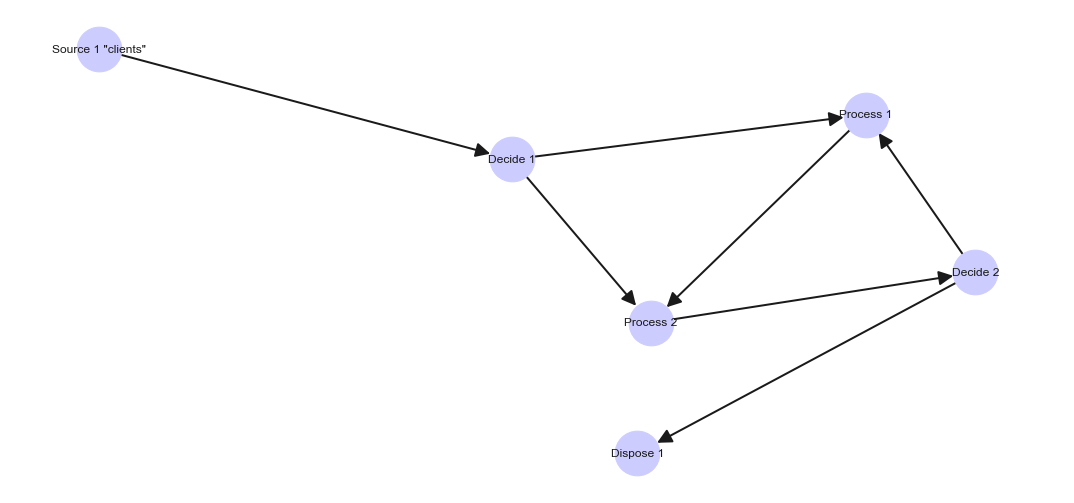

In [8]:
dg = build_graph([source])
fig, ax = plt.subplots(figsize=(19, 9))
nx.draw(dg, ax=ax, with_labels=True, node_color='#CCCCFF', node_size=2000, arrowsize=30, width=2)